# Job Database Data

A notebook to explore the MassDigi Database   
Let's start by getting the data out

In [1]:
import json
import re

with open("JobDatabase.json",'r') as f:
    data = json.loads(f.read())

To properly explore the data let's create a function to get out a column of data.

In [2]:
def get_column(idx):
    return [line[idx] for line in data]

#### What does the database look like? Let's show some data.

In [3]:
data[0]

{'Additional Benefits': '',
 'Amount of Shipped Titles': 'N/A',
 'Commitment': '',
 'Date of Publication (Month, Day, Year)': 'Mar 12, 2019',
 'Degree Required ': 'No',
 'Do any other sections apply to this posting': 'No',
 'Email Address': '',
 'Employer': '343 Industries',
 'Job Level ': 'Junior (4-5 years of experience)',
 'Job Title': 'UI Artist',
 'Link to Post': 'https://careers.microsoft.com/us/en/job/578310/UI-Artist',
 'Location of Position': 'Redmond, WA',
 'Minimum Years of Experience': '4',
 'Number of Employees': '',
 'Position Type': 'Art',
 'Skills': {'Art': ['2D Art',
   'Photoshop',
   'Maya',
   'Illustrator',
   '2D Vector',
   'Iconography',
   'UI Design',
   'Typography'],
  'Hard': ['Cinema 4D'],
  'Soft': ['Communication Skills',
   'Creative Problem Solving',
   'Ability to Learn',
   'Creative Eye',
   'Collaborative',
   'ability to iterate upon design foundation']},
 'Timestamp': '9/12/2019 11:38:31',
 "Website it's found on": 'careers.microsoft.com'}

The data is mainly text based (which makes sense for a job descrpiton.) There's one stat that is numeric. That being number of years of experience. Let's look at that data. 

In [5]:
years_ex = get_column("Minimum Years of Experience")

In [6]:
print(years_ex)

['4', '7', '5', '5', '8', '5', '5', '2', '0', '2', '2', '2', '1', '3', 'N/A', '2 years', 'preferred 3 years', '3 years', '1', '4', '6+', '5+', '3+', '2+', '2+', 'N/A', '4+', '5', '3', '3', '5', 'N/A', '1', '3', '5', 'N/A', '3', '3', '2', '2', '2', 'N/A', 'N/A', 'N/A', '2', '2', '2', 'N/A', 'N/A', '2', 'N/A', '6 months', 'N/A', 'N/A', '2', '5', 'N/A', '3', '5', '3', 'N/A', 'N/A', '3 years', '3', '2', 'N/a', '5+', '5', 'N/A', '5+', 'N/A', 'N/A', '5', '5', 'N/A', '5+', '5', 'N/A', '2+', '1', 'N/A', '10', '10+', '4+', '3', '', '3', '', '3', '2-3', '1', '6+', 'N/A', '0', '3', '2', 'N/A', '4', 'N/A', 'N/A', 'N/A', '7', '5', 'N/A', '5', '', '3', '4 years of experience in software engineering', '3', '5', '', '3', '3', '4', '3', 'N/A', '3', '3']


Yuck   
That's not very well formatted for visualzation.   
Let's do a bit of editing to the data to take the numbers out.

In [7]:
num_list = []

# Pull out the number from a string
for num in years_ex:
    num_list.append(re.findall(r'\d+',num))


# Convert the numbers into a float
num_list = [float(num[0]) for num in num_list if len(num)>0]

In [8]:
print(num_list)

[4.0, 7.0, 5.0, 5.0, 8.0, 5.0, 5.0, 2.0, 0.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 3.0, 3.0, 1.0, 4.0, 6.0, 5.0, 3.0, 2.0, 2.0, 4.0, 5.0, 3.0, 3.0, 5.0, 1.0, 3.0, 5.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 2.0, 5.0, 3.0, 5.0, 3.0, 3.0, 3.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 1.0, 10.0, 10.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 6.0, 0.0, 3.0, 2.0, 4.0, 7.0, 5.0, 5.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0]


That's much better. Okay let's do an inital visualzation.

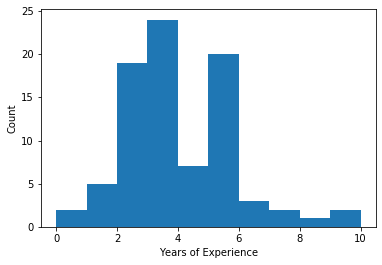

In [16]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Count")
ax.hist(num_list)
plt.show()

One other question I have is how much of each title (junior or senior) there is. Let's visualize a bar graph of that.


## Let's use Pandas for this next thing

In [21]:
import pandas as pd

In [27]:
df = pd.read_json("JobDatabase.json")
df.describe()

,Additional Benefits,Amount of Shipped Titles,Commitment,"Date of Publication (Month, Day, Year)",Degree Required,Do any other sections apply to this posting,Email Address,Employer,Job Level,Job Title,Link to Post,Location of Position,Minimum Years of Experience,Number of Employees,Position Type,Skills,Timestamp,Website it's found on
count,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
unique,34,18,4,24,3,2,20,95,4,99,113,79,24,9,6,118,118,37
top,,N/A,,,No,No,JenniferKindl17@gmail.com,Cryptic Studios,Entry (2 years of experience),Environment Artist,,"Los Angeles, CA",N/A,,Art,"{'Hard': ['proofreading', 'Match-3 Game Design...",2019-09-23 08:35:59,LinkedIn
freq,73,69,61,58,71,76,35,3,62,5,3,4,28,110,44,1,1,22
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-12 11:38:31,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-29 19:58:35,NaN


In [61]:
groups = df.groupby(by="Job Level ")["Job Level "]

In [65]:
counts = groups.count()
counts

Job Level 
                                     3
Entry (2 years of experience)       62
Junior (4-5 years of experience)    42
Senior (8+ years of experience)     11
Name: Job Level , dtype: int64

<BarContainer object of 3 artists>

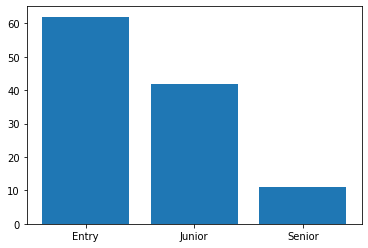

In [68]:
plt.bar(["Entry","Junior","Senior"],[62,42,11])

In [69]:
df

,Additional Benefits,Amount of Shipped Titles,Commitment,"Date of Publication (Month, Day, Year)",Degree Required,Do any other sections apply to this posting,Email Address,Employer,Job Level,Job Title,Link to Post,Location of Position,Minimum Years of Experience,Number of Employees,Position Type,Skills,Timestamp,Website it's found on
0,,N/A,,"Mar 12, 2019",No,No,,343 Industries,Junior (4-5 years of experience),UI Artist,https://careers.microsoft.com/us/en/job/578310...,"Redmond, WA",4,,Art,"{'Art': ['2D Art', 'Photoshop', 'Maya', 'Illus...",2019-09-12 11:38:31,careers.microsoft.com
1,N/A,N/A,,"September 11, 2019",Yes,No,,Insomniac Games,Senior (8+ years of experience),Sr Engine Programmer,https://jobs.gamasutra.com/job/sr-engine-progr...,"Burbank, California",7,,Programming,"{'Hard': ['C programming', 'Assembly programmi...",2019-09-12 11:40:23,Gamasutra
2,Help protect employees against income interrup...,N/A,,Over a month ago,No,No,,Disruptor Beam,Senior (8+ years of experience),Senior Game Designer (Systems Design),https://g.co/kgs/SSySnX,"Framingham, MA",5,,Design,"{'Design': ['Excel', 'Understanding of Analyti...",2019-09-12 11:42:10,Google
3,Equal Opportunity Employer,1,,N/A,No,No,,Sony Interactive Entertainment PlayStation,Junior (4-5 years of experience),Senior Sound Designer,https://boards.greenhouse.io/sonyinteractiveen...,"Bend, OR",5,,Audio,"{'Audio': ['Sound Design', 'Foley', 'Mixing', ...",2019-09-12 11:43:31,Bend Studio website
4,N/A,N/A,,"July 24, 2019",No,No,,Monolith,Senior (8+ years of experience),Advanced Narrative Designer,https://www.lith.com/careers/171457br/advanced...,"Kirkland, WA",8,,Writing,"{'Hard': ['Published writing experience', 'Kno...",2019-09-12 11:49:16,Monolith Careers page
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,,,Full Time,,Yes,,jqsuereth@gmail.com,Insight Global,Junior (4-5 years of experience),Game Analytics Software Engineer,https://www.careerbuilder.com/job/J3W2P96L1VFQ...,"Orlando, Florida",4,,Programming,"{'Hard': ['4+ years of experience in UI, engin...",2019-10-29 19:50:30,Careerbuilder.com
114,,N/A,Full Time,,No,,hobbitinthewoods@gmail.com,Bungie,Junior (4-5 years of experience),Associate Producer,https://www.indeed.com/viewjob?jk=2387118948e5...,"Bellevue, Washington",3,,Production,"{'Hard': [], 'Soft': ['Team Managment', 'Commu...",2019-10-29 19:50:47,indeed.com
115,,2,Full Time,,No,,tristansistare@gmail.com,Squanch Games,Entry (2 years of experience),Gameplay Programmer,https://www.linkedin.com/jobs/view/1491076645/...,"Raleigh, NC, US",N/A,,Programming,"{'Hard': ['ABCL/c+ experience'], 'Programming'...",2019-10-29 19:53:37,Linkedin
116,,N/A,Full Time,,No,,jqsuereth@gmail.com,Volt,Junior (4-5 years of experience),UX Designer,https://www.careerbuilder.com/job/J3S5506CWMSD...,"El Segundo, California",3,,Art,"{'Art': ['UI Design'], 'Hard': ['Game producti...",2019-10-29 19:58:15,Careerbuilder.com


ValueError: shape mismatch: objects cannot be broadcast to a single shape

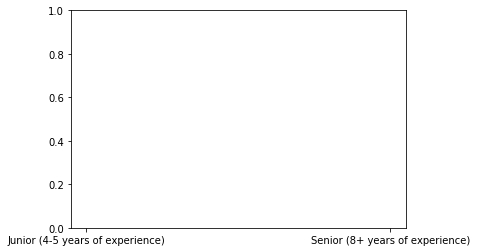